In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
dfs = pd.read_csv('Week1_challenge_data_source.csv', parse_dates=['Start','End'])
dfs['MSISDN/Number'] = dfs['MSISDN/Number'].apply(str)

In [3]:
class GetDfForPreprocessing:
    """
    this function will prepare data form dataframe for preprocessing
    
    Return
    ------
    dataframe
    """
    def __init__(self, df:pd.DataFrame):
        
        self.df = df
        
    def print_df_info(self) -> None:
        """
        this function will print the info of the datafame

        Return
        ------
        None
        """
        print('Retrieving info from data...')
        #save the number of columns and names
        col_info = 'The number of colum(s): {}.\nThe column(s) is/are : {} and {}\n'.format(len(self.df.columns),', '.join(self.df.columns[:-2]), self.df.columns[-1])  
        
        #save the number of rows
        num_rows = "\nThe total number of rows: {}".format(len(self.df))
        
        na_cols = self.df.columns[self.df.isnull().any()]
        
        #save the number of missing values
        num_na_cols = "\nThe number of columns having missing value(s): {}".format(len(na_cols))
        
        #save the columns with missing value and the num of values missing
        na_cols_num_na = ''
        
        na_col_val_dict = {}
        for col in na_cols:
            missing_vals = self.df[col].isnull().sum()
            na_col_val_dict[col] = missing_vals
            na_cols_num_na += "\nThe number of rows with missing value(s) in [{}]: {}".format(col, missing_vals)
        
        # save the total number of missing values
        tot_na = "\nThe total number of missing value(s): {}".format(self.df.isnull().sum().sum())
        
        self.na_cols = na_cols
        self.na_col_val_dict = na_col_val_dict
        
        print(col_info, num_rows, num_na_cols, na_cols_num_na)
        
        
    def drop_cols_abv_na_trshld(self, threshold:float) -> pd.DataFrame:
        """
        this function will drop columns with missing values above a specified threshold

        Return
        ------
        dataframe
        """
        print('\nComparing threshold with fraction of missing values ...')
        df = self.df
        try:
            if self.na_col_val_dict:
                na_col_val_dict = self.na_col_val_dict
                na_cols = self.na_col_val_dict
        except:
            na_cols = df.columns[df.isnull().any()]
            na_col_val_dict = {}
            for col in na_cols:
                missing_vals = df[col].isnull().sum()
                na_col_val_dict[col] = missing_vals
            
        tot_entries = len(df)
        above_treshold = []
        
        print('\nRetrieving columns to be dropped ...')
        for col in na_cols:
            if na_col_val_dict[col] > threshold * tot_entries:
                above_treshold.append(col)
                
        print('\nColumns to be dropped :', above_treshold)
                
        print('\nDropping columns with missing values above the threshold ...') 
        df.drop(above_treshold, axis=1, inplace=True)
        
        print('\nDropping columns completed')
        return df  


In [4]:
prep = GetDfForPreprocessing(dfs)
telco_raw = prep.drop_cols_abv_na_trshld(0.3)


Comparing threshold with fraction of missing values ...

Retrieving columns to be dropped ...

Columns to be dropped : ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']

Dropping columns with missing values above the threshold ...

Dropping columns completed


In [41]:
def create_agg(df, slice_cols, agg_col):
    dfs_agg = df[slice_cols].groupby(agg_col, axis=0).sum()
    dfs_agg = dfs_agg.reset_index()
    dfs_agg['num_xDR_sess'] = dfs_agg[slice_cols[2:-2]].notna().sum(axis=1)/2
    dfs_agg['Tot_DL_UL (Bytes)'] = dfs_agg[['Total DL (Bytes)','Total UL (Bytes)']].sum(axis=1)
    dfs_agg['Social Media total data (Bytes)'] = dfs_agg[['Social Media DL (Bytes)','Social Media UL (Bytes)']].sum(axis=1)
    dfs_agg['Youtube total data (Bytes)'] = dfs_agg[['Youtube DL (Bytes)','Youtube UL (Bytes)']].sum(axis=1)
    dfs_agg['Netflix total data (Bytes)'] = dfs_agg[['Netflix DL (Bytes)','Netflix UL (Bytes)']].sum(axis=1)
    dfs_agg['Google total data (Bytes)'] = dfs_agg[['Google DL (Bytes)','Google UL (Bytes)']].sum(axis=1)
    dfs_agg['Email total data (Bytes)'] = dfs_agg[['Email DL (Bytes)','Email UL (Bytes)']].sum(axis=1)
    dfs_agg['Gaming total data (Bytes)'] = dfs_agg[['Gaming DL (Bytes)','Gaming UL (Bytes)']].sum(axis=1)
    dfs_agg['Other total data (Bytes)'] = dfs_agg[['Other DL (Bytes)','Other UL (Bytes)']].sum(axis=1)

    df_raw = dfs_agg[['num_xDR_sess',
             'Tot_DL_UL (Bytes)',
             'Social Media total data (Bytes)',
             'Youtube total data (Bytes)',
             'Netflix total data (Bytes)',
             'Google total data (Bytes)',
             'Email total data (Bytes)',
             'Gaming total data (Bytes)',
             'Other total data (Bytes)',
             'Dur. (ms)'
            ]]
    return df_raw

In [6]:
slice_cols = ['MSISDN/Number',
    'Dur. (ms)',
    'Social Media DL (Bytes)',
    'Social Media UL (Bytes)',
    'Youtube DL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix DL (Bytes)',
    'Netflix UL (Bytes)',
    'Google DL (Bytes)',
    'Google UL (Bytes)',
    'Email DL (Bytes)',
    'Email UL (Bytes)',
    'Gaming DL (Bytes)',
    'Gaming UL (Bytes)',
    'Other DL (Bytes)',
    'Other UL (Bytes)',
    'Total DL (Bytes)',
    'Total UL (Bytes)']

In [42]:
telco_agg = create_agg(df=telco_raw, slice_cols=slice_cols, agg_col='MSISDN/Number')

In [43]:
telco_agg

,num_xDR_sess,Tot_DL_UL (Bytes),Social Media total data (Bytes),Youtube total data (Bytes),Netflix total data (Bytes),Google total data (Bytes),Email total data (Bytes),Gaming total data (Bytes),Other total data (Bytes),Dur. (ms)
0,7.0,2.321240e+08,7.152240e+05,1.195990e+07,2.659230e+07,1.043866e+07,1.520771e+06,1.780487e+08,4.705265e+08,877385.0
1,7.0,8.786906e+08,2.232135e+06,2.162455e+07,2.718098e+07,4.389005e+06,1.331362e+06,8.124587e+08,3.865709e+08,116720.0
2,7.0,1.568596e+08,2.660565e+06,1.243222e+07,1.122176e+07,5.334863e+06,3.307781e+06,1.197501e+08,2.817101e+08,181230.0
3,7.0,5.959665e+08,3.195623e+06,2.133357e+07,1.935390e+07,3.443126e+06,3.205380e+06,5.388277e+08,5.016937e+08,134969.0
4,7.0,4.223207e+08,2.802940e+05,6.977321e+06,1.942092e+06,9.678493e+06,2.284670e+06,3.911261e+08,3.527970e+07,49878.0
...,...,...,...,...,...,...,...,...,...,...
106852,7.0,1.094693e+09,4.250312e+06,3.801281e+07,5.195031e+07,1.024647e+07,5.315327e+06,9.723450e+08,1.075140e+09,210389.0
106853,7.0,7.146416e+08,3.001830e+05,2.664784e+07,1.490254e+07,7.531269e+06,1.006915e+06,6.603614e+08,2.952828e+08,8810.0
106854,7.0,4.803073e+08,4.985690e+05,1.985157e+07,8.531060e+06,5.429705e+06,2.514097e+06,4.370033e+08,2.111151e+08,140988.0
106855,7.0,1.391536e+08,1.546088e+06,4.094071e+07,2.884623e+07,9.218647e+06,3.330974e+06,4.307026e+07,4.013605e+08,869844.0


In [37]:
def remove_outliers(df,threshold = 2, method='mean' )->pd.DataFrame:
    print('Iterating through columns of dataframe...')
    for col in df.columns:
        colmn = df[col]
        if method == 'median':
            replacer = colmn.median()
        else:
            replacer = colmn.mean()
        # compute the z-score for all values
        print('Computing z-score for values...')
        z = np.abs(stats.zscore(colmn))
        arr = df[col].values
        outlier_pos = np.where(z > threshold)
        if len(outlier_pos) != 0:
            print('Replacing outliers in {}'.format(col))
        arr[outlier_pos] = replacer
        df[col] = arr
    print('Outlier removals complete')
    return df

In [39]:
telco_df_processed = remove_outliers(telco_agg)

Iterating through columns of dataframe...
Computing z-score for values...
Replacing outliers in num_xDR_sess
Computing z-score for values...
Replacing outliers in Tot_DL_UL (Bytes)
Computing z-score for values...
Replacing outliers in Social Media total data (Bytes)
Computing z-score for values...
Replacing outliers in Youtube total data (Bytes)
Computing z-score for values...
Replacing outliers in Netflix total data (Bytes)
Computing z-score for values...
Replacing outliers in Google total data (Bytes)
Computing z-score for values...
Replacing outliers in Email total data (Bytes)
Computing z-score for values...
Replacing outliers in Gaming total data (Bytes)
Computing z-score for values...
Replacing outliers in Other total data (Bytes)
Computing z-score for values...
Replacing outliers in Dur. (ms)
Outlier removals complete


In [10]:
def describe(df:pd.DataFrame, stats=['skew', 'mad', 'median', 'kurt'])->pd.DataFrame:
    d = df.describe()
    return d.append(df.reindex(d.columns, axis=1).agg(stats))

In [11]:
task1_dec = describe(df=telco_df_processed)
task1_dec.to_csv('task1_data_desc_raw.csv')

In [12]:
def compare_date_app_usage(df, usage_lst, nrows, ncols, const_col, figsize, xlabel, ylabel):    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=figsize)

    index = 0
    print('Creating plots....')
    for ax in axes.flat: 
        x = df[const_col]
        y = df[usage_lst[index]]
        #colors = np.random.random((20, 3))
        sns.set(rc={'figure.figsize':(5,5)})
        sns.scatterplot(x, y, ax=ax)
        ax.tick_params(axis='x', labelsize=12, rotation=75)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(usage_lst[index], fontsize=16)
        #ax.set(xticks=np.linspace(0, 10, 6), yticks=np.linspace(0, 10, 6))
        index += 1

    # first column of axes:
    for ax in axes[:, 0]:
        ax.set_ylabel(ylabel)

    # last row
    for ax in axes[nrows-1, :]:
        ax.set_xlabel(xlabel)
    sns.set_context('paper')
    sns.set_style('darkgrid')    
    plt.subplots_adjust(top = 0.96, bottom=0.05, hspace=0.3, wspace=0.4)
    fig.savefig('date_app_usage.png')
    print("Chart saved as 'date_app_usage.png' in home directory")

    plt.show()



In [13]:
usage_lst = ['Social Media DL (Bytes)',
        'Social Media UL (Bytes)',
        'Youtube DL (Bytes)',
        'Youtube UL (Bytes)',
        'Netflix DL (Bytes)',
        'Netflix UL (Bytes)',
        'Google DL (Bytes)',
        'Google UL (Bytes)',
        'Email DL (Bytes)',
        'Email UL (Bytes)',
        'Gaming DL (Bytes)',
        'Gaming UL (Bytes)',
        'Other DL (Bytes)',
        'Other UL (Bytes)']

Creating plots....
Chart saved as 'date_app_usage.png' in home directory


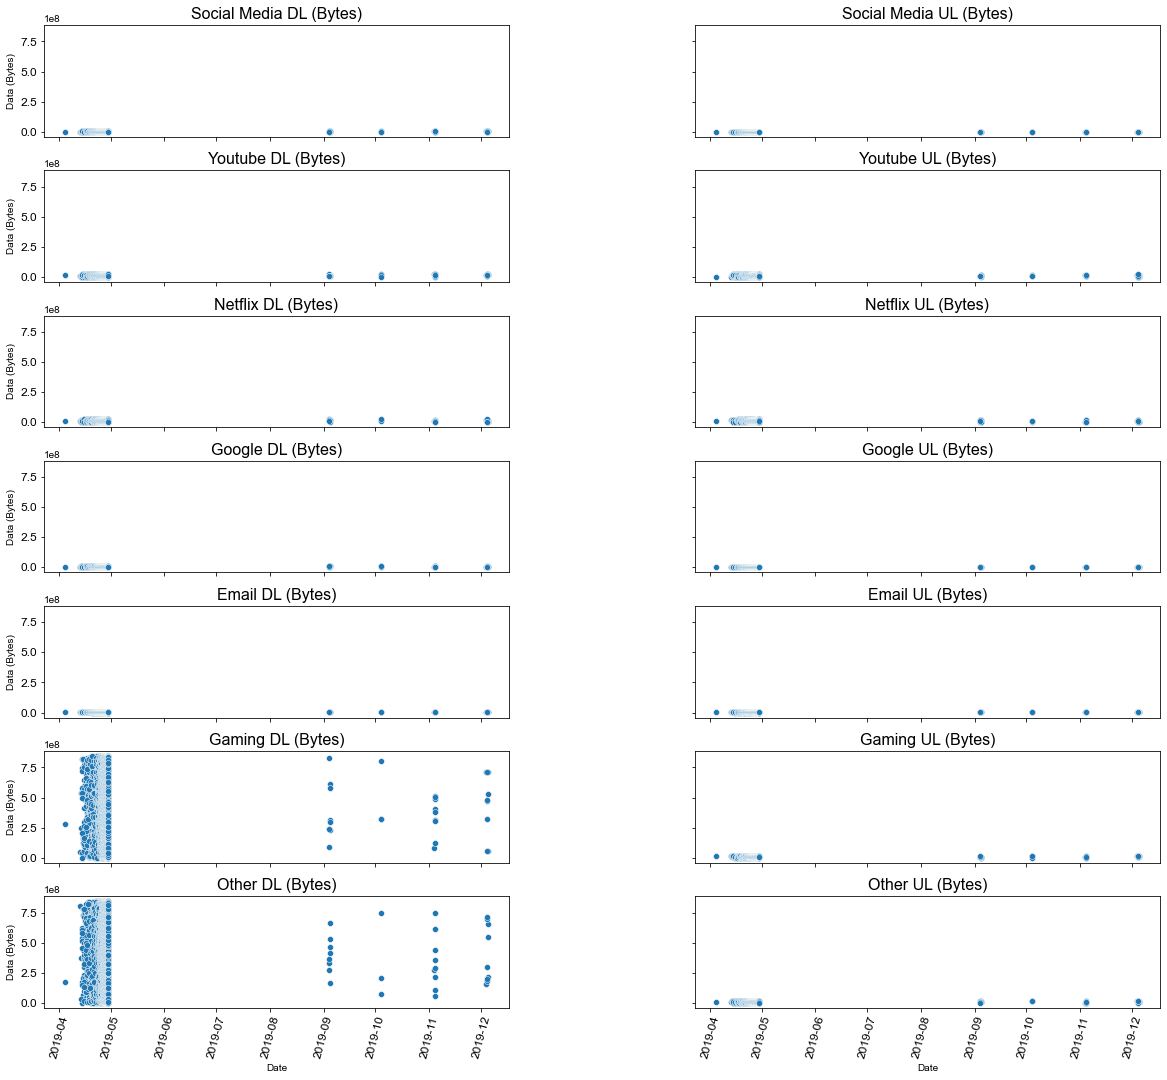

In [14]:
compare_date_app_usage(df=telco_raw,  usage_lst=usage_lst, nrows=7, ncols=2, const_col='Start', figsize=(20,15), xlabel='Date', ylabel='Data (Bytes)')

In [20]:
def create_boxplot(df, filename, chart_title):
    minmax_scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
    fig, ax = plt.subplots(figsize=(20,15))
    sns.boxplot(ax=ax, data=scaled_data)
    ax.tick_params(axis='x', labelsize=12, rotation=75)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_title(chart_title, fontsize=16)
    fig.savefig(filename)
    print('Chart saved as {} in home directory'.format(filename))

Chart saved as processed_data.png in home directory
Chart saved as Unprocessed Data in home directory


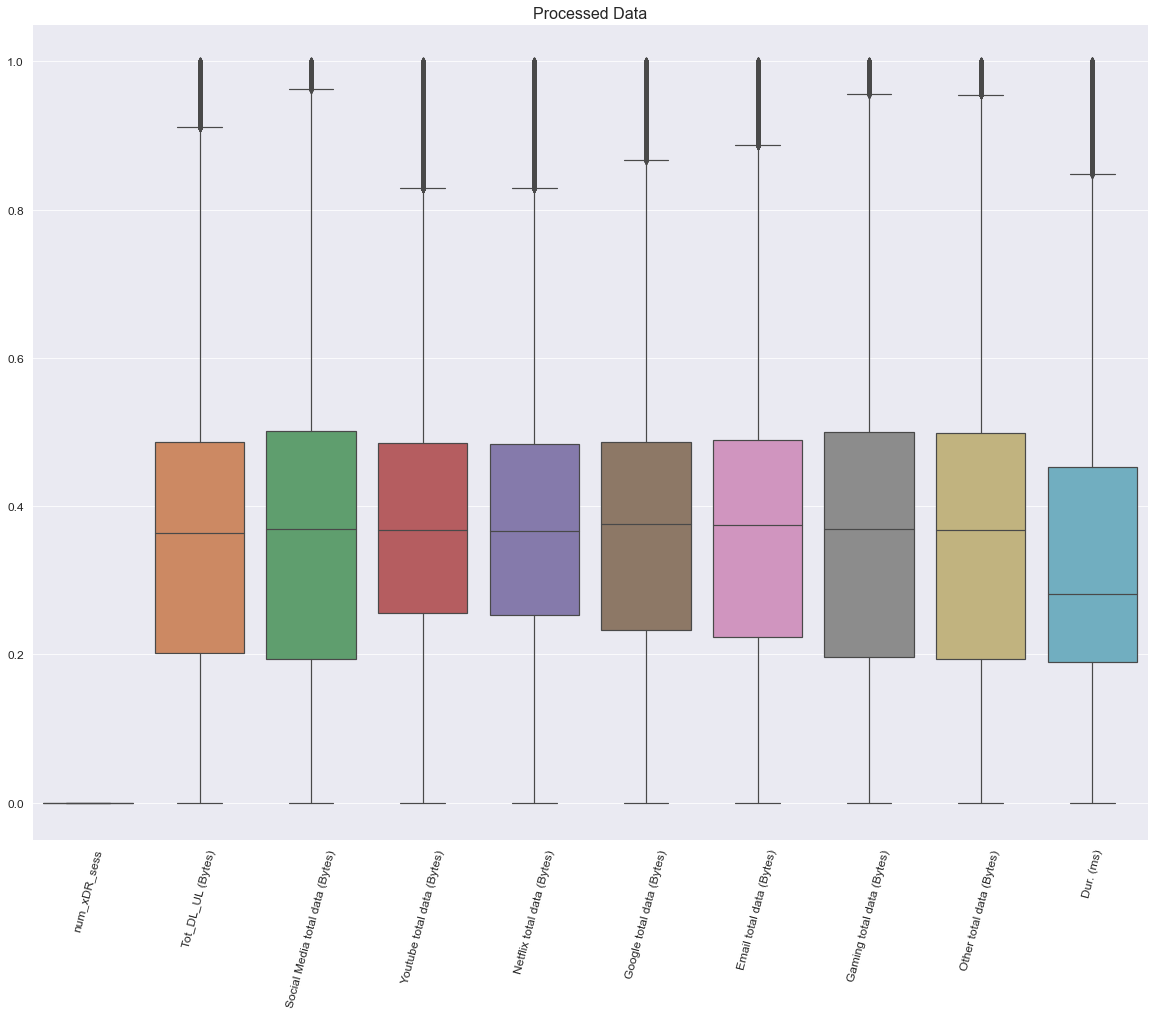

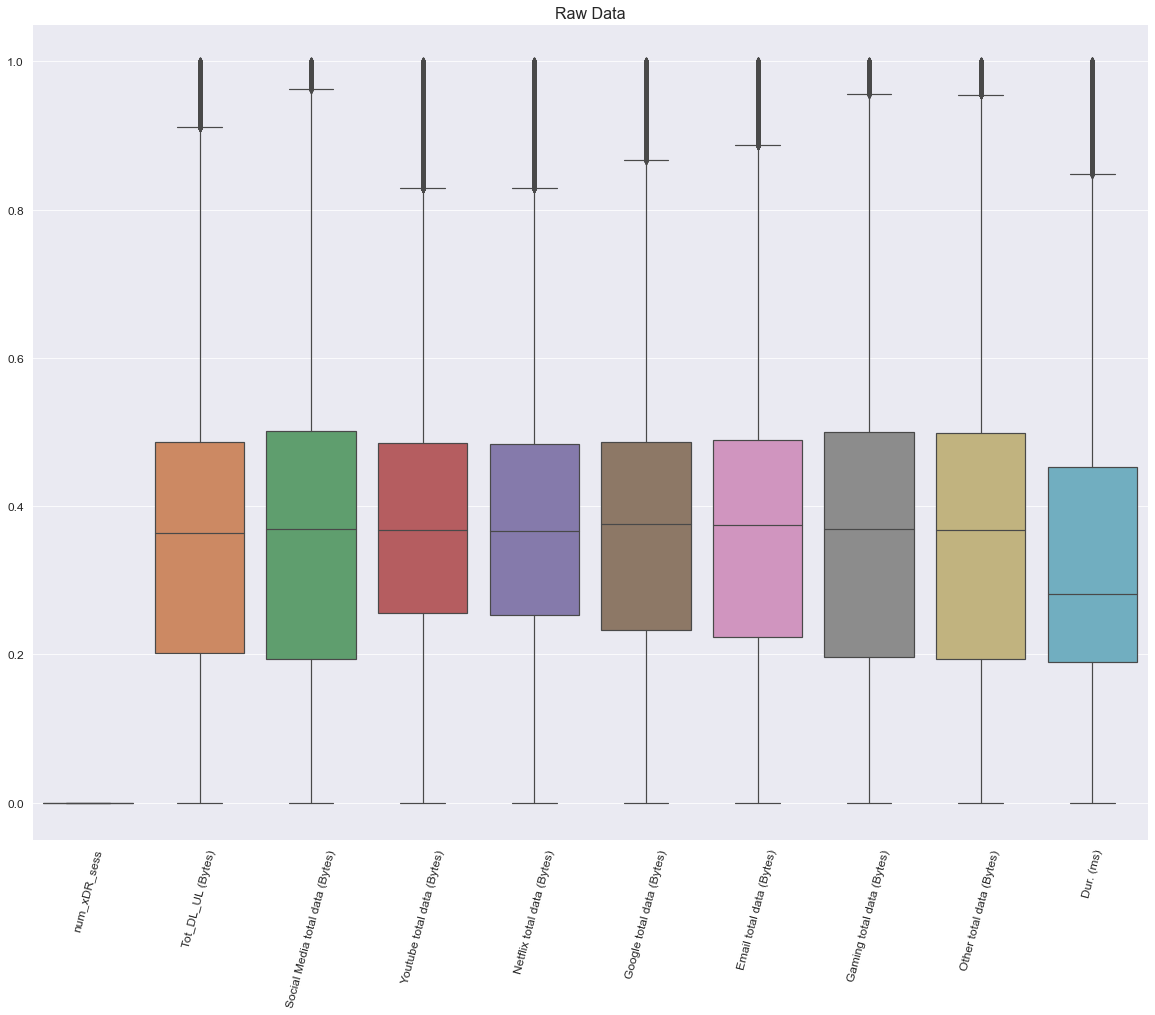

In [40]:
create_boxplot(df=telco_df_processed, filename='processed_data.png', chart_title='Processed Data')
create_boxplot(df=telco_agg, filename='Unprocessed Data', chart_title='Raw Data')

In [17]:
telco_agg.sum() == telco_df_processed.sum()

num_xDR_sess                        True
Tot_DL_UL (Bytes)                  False
Social Media total data (Bytes)    False
Youtube total data (Bytes)         False
Netflix total data (Bytes)         False
Google total data (Bytes)          False
Email total data (Bytes)           False
Gaming total data (Bytes)          False
Other total data (Bytes)           False
Dur. (ms)                          False
dtype: bool